My statement is simple I will be analysing the Boston data for crime prices in depending on price of houses. The features selection and reduction should help with making the model better to understand the probability of crime base on price. Doing a graphical analysis and using the techniques learned in the class. I will be implementing the feature selection and model.

The data was clean by me manually before hand, I will still need to filter some values which might be out of range or affect the model into a lower probability. However, analysing the four graph below, I had trouble understanding the values. The data is not normalize and thed techniques being used by are not proper for this data.

The first graph was a plot and it tried to compare the crime and age to identify a correlation with the data. However, the graph does not look like a proper line chart. I cannot identify any patter or algorithm in the data.

The second graph is using the price and age to get a correlation. At first, it is hard to see a correlation. However, we can start to detect a pattern in the group of points. We can see as the person age increases, the prices of houses goes down.

Third graph, we have a problem, it seems we have data that does not belong! At the end of the histogram there seem to be an outlier. It is hard to see the data meaning without further cleaning and analyzing.

The last graph, does indeed show the ranges of the tax values, the graph is clean and cosise

In [99]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [100]:
houseData = pd.read_csv("boston_corrected.csv", keep_default_na=False, low_memory=False)

In [101]:
houseData.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [102]:
houseData.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


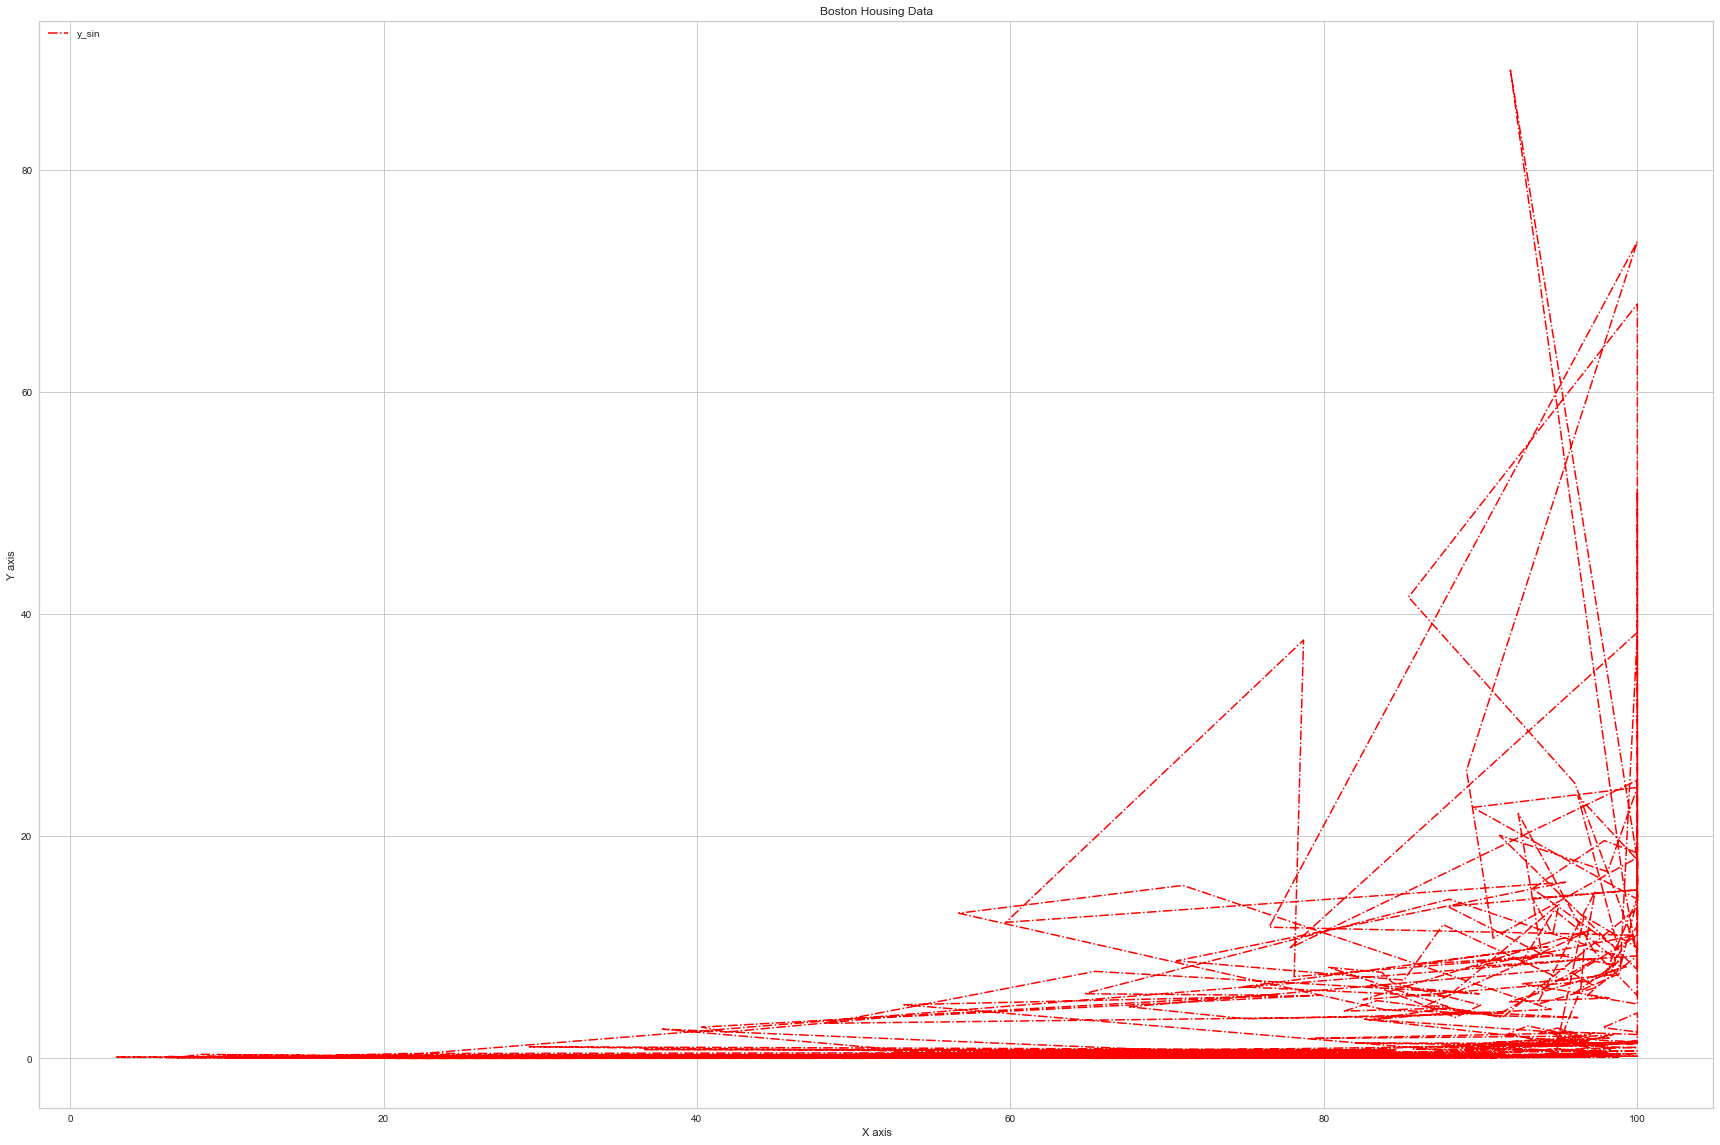

In [103]:
plt.title('Boston Housing Data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.plot(houseData['AGE'], houseData['CRIM'], color = "red", linewidth = 1.5, linestyle = "-.", label = "y_sin")
#plt.plot(x, y_cos, marker = '+', linestyle = '-', label = 'y_cos')
plt.legend(loc = "upper left")
plt.show()

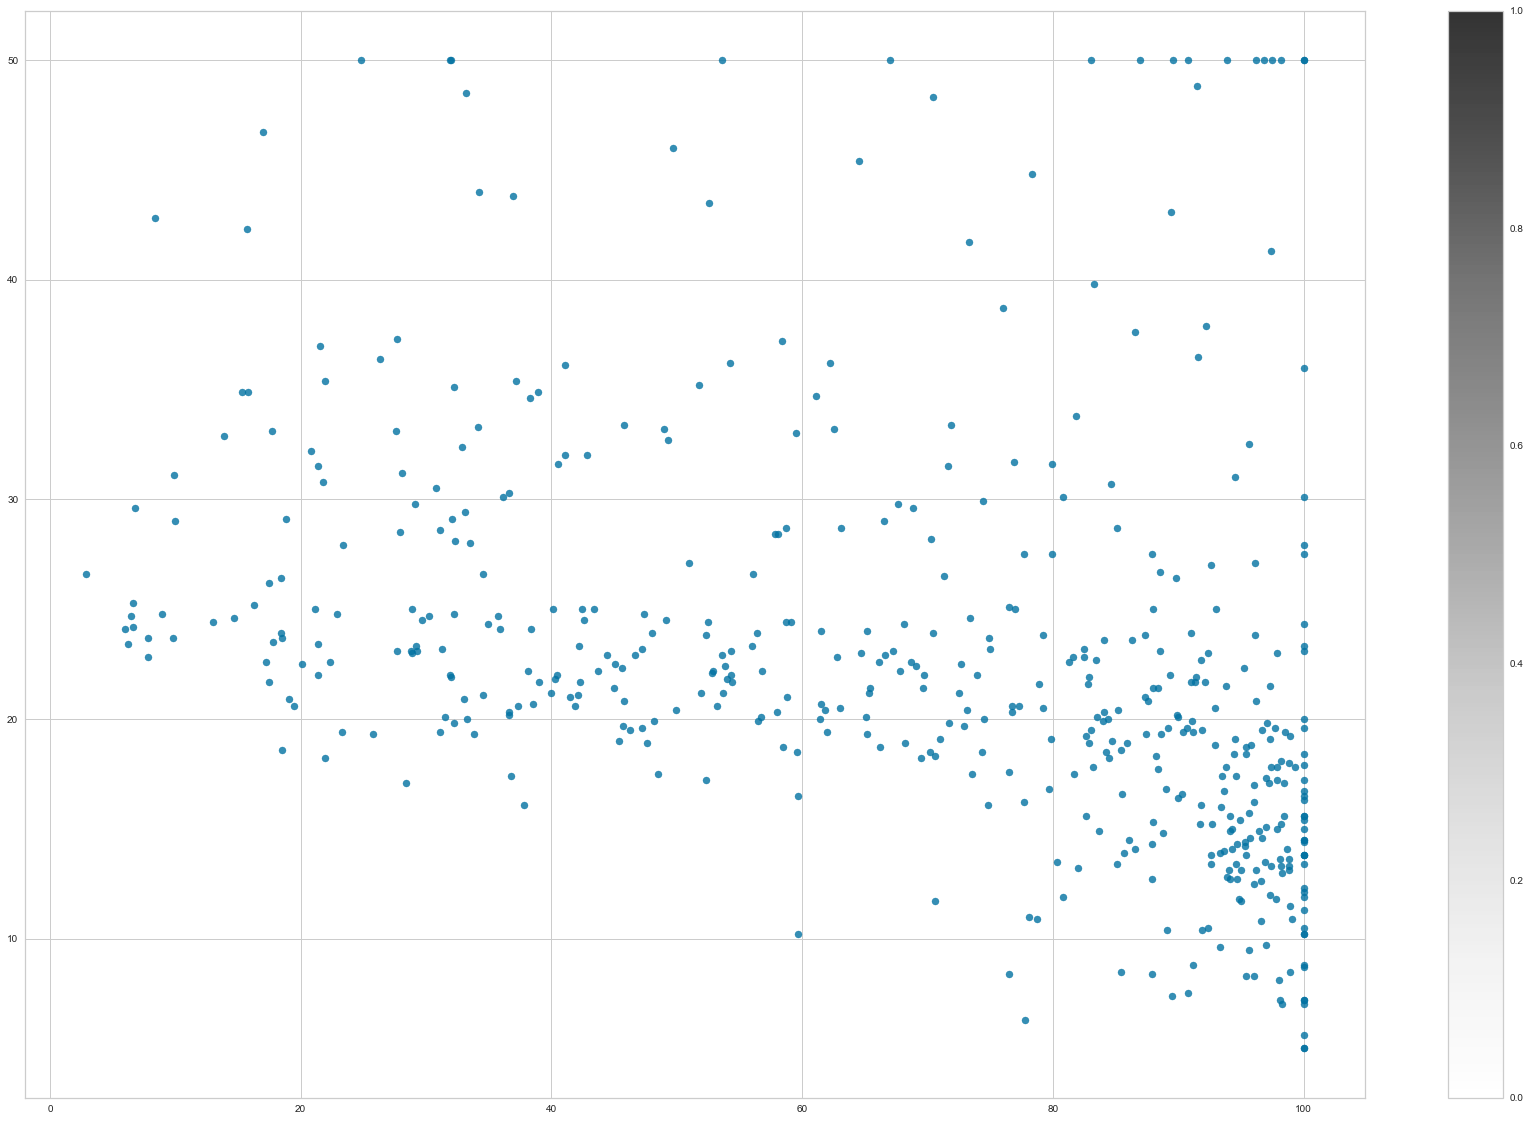

In [104]:
plt.scatter(houseData["AGE"], houseData['PRICE'], s = 50, alpha = 0.8)
plt.colorbar()
plt.show()

<BarContainer object of 506 artists>

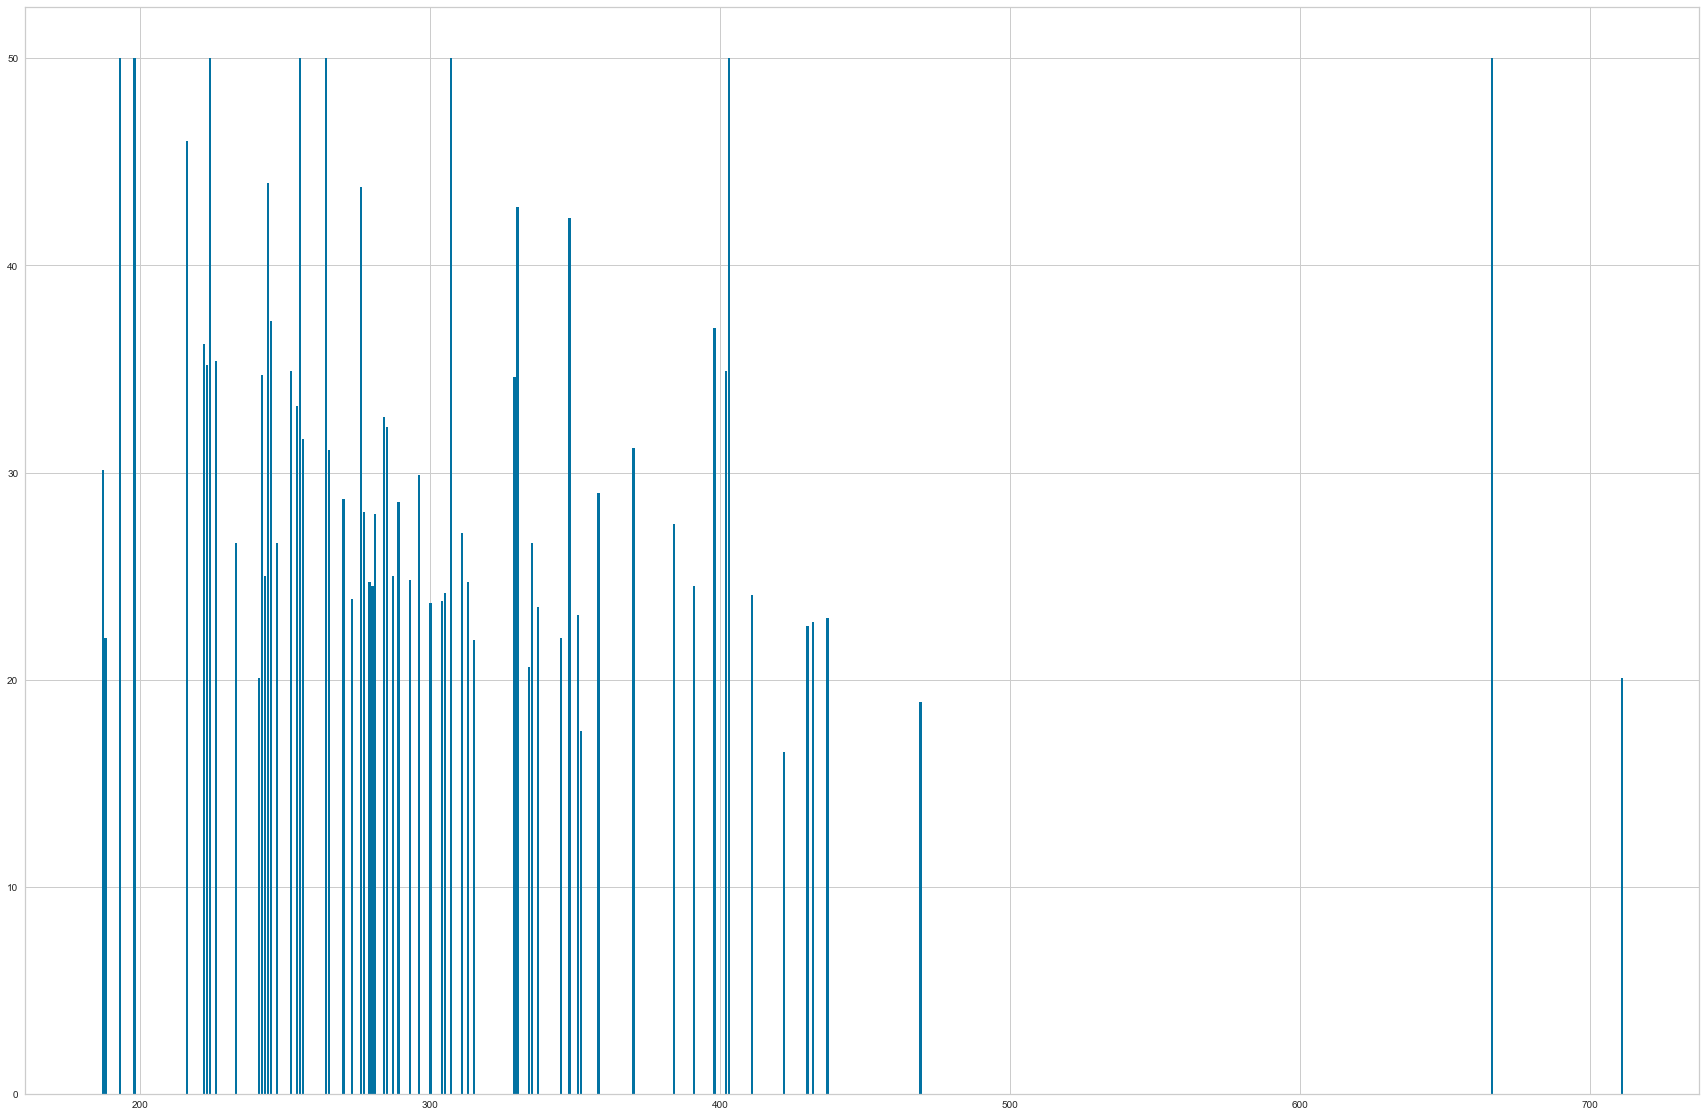

In [105]:
plt.bar(houseData['TAX'], houseData['PRICE'])

In [106]:
houseData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

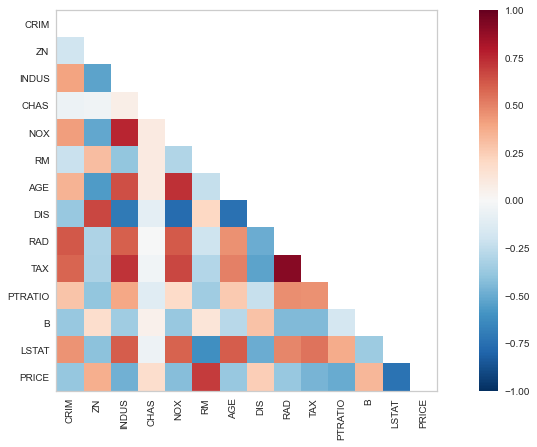

In [107]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']

#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = houseData[columns].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=columns, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Tr

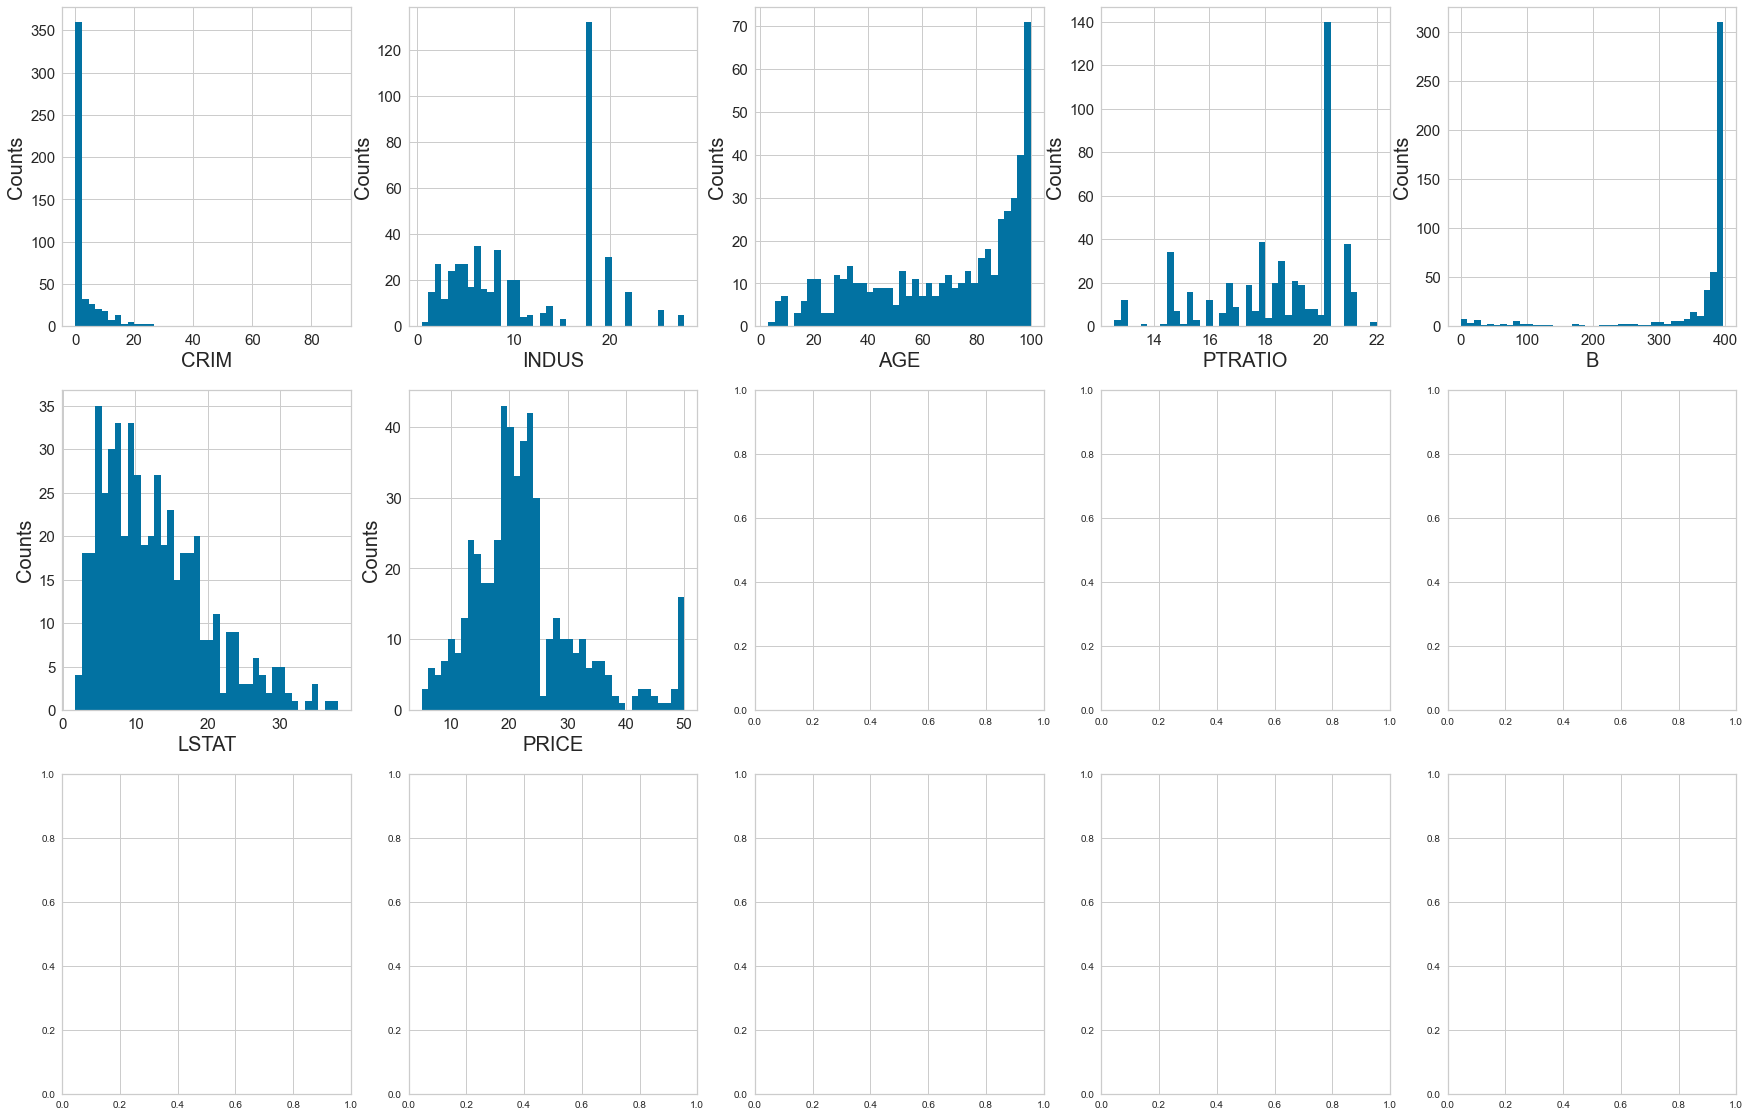

In [108]:
import matplotlib.pyplot as plt

columns = ['CRIM', 'INDUS', 'AGE', 
       'PTRATIO', 'B', 'LSTAT', 'PRICE']

plt.rcParams['figure.figsize'] = (30, 20)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 5)

axes = axes.ravel()
for idx, ax in enumerate(axes):
    if(idx < len(columns)):
        ax.hist(houseData[columns[idx]].dropna(), bins=40)
        ax.set_xlabel(columns[idx], fontsize=20)
        ax.set_ylabel("Counts", fontsize=20)
        ax.tick_params(axis='both', labelsize=15)


In [109]:
from sklearn.feature_selection import mutual_info_regression
from scipy import sparse

corr_matrix = houseData.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# according to the report 75% zeros, remove
houseData = houseData.drop(["ZN"], axis=1).drop(to_drop, axis=1)
houseData = houseData.drop(["B"], axis=1)
spareMatrix = sparse.dok_matrix(houseData.drop(["CRIM"], axis=1))

mutualInfoRequession = mutual_info_regression(spareMatrix, houseData["CRIM"])

In [110]:
to_drop

['TAX']

<AxesSubplot:>

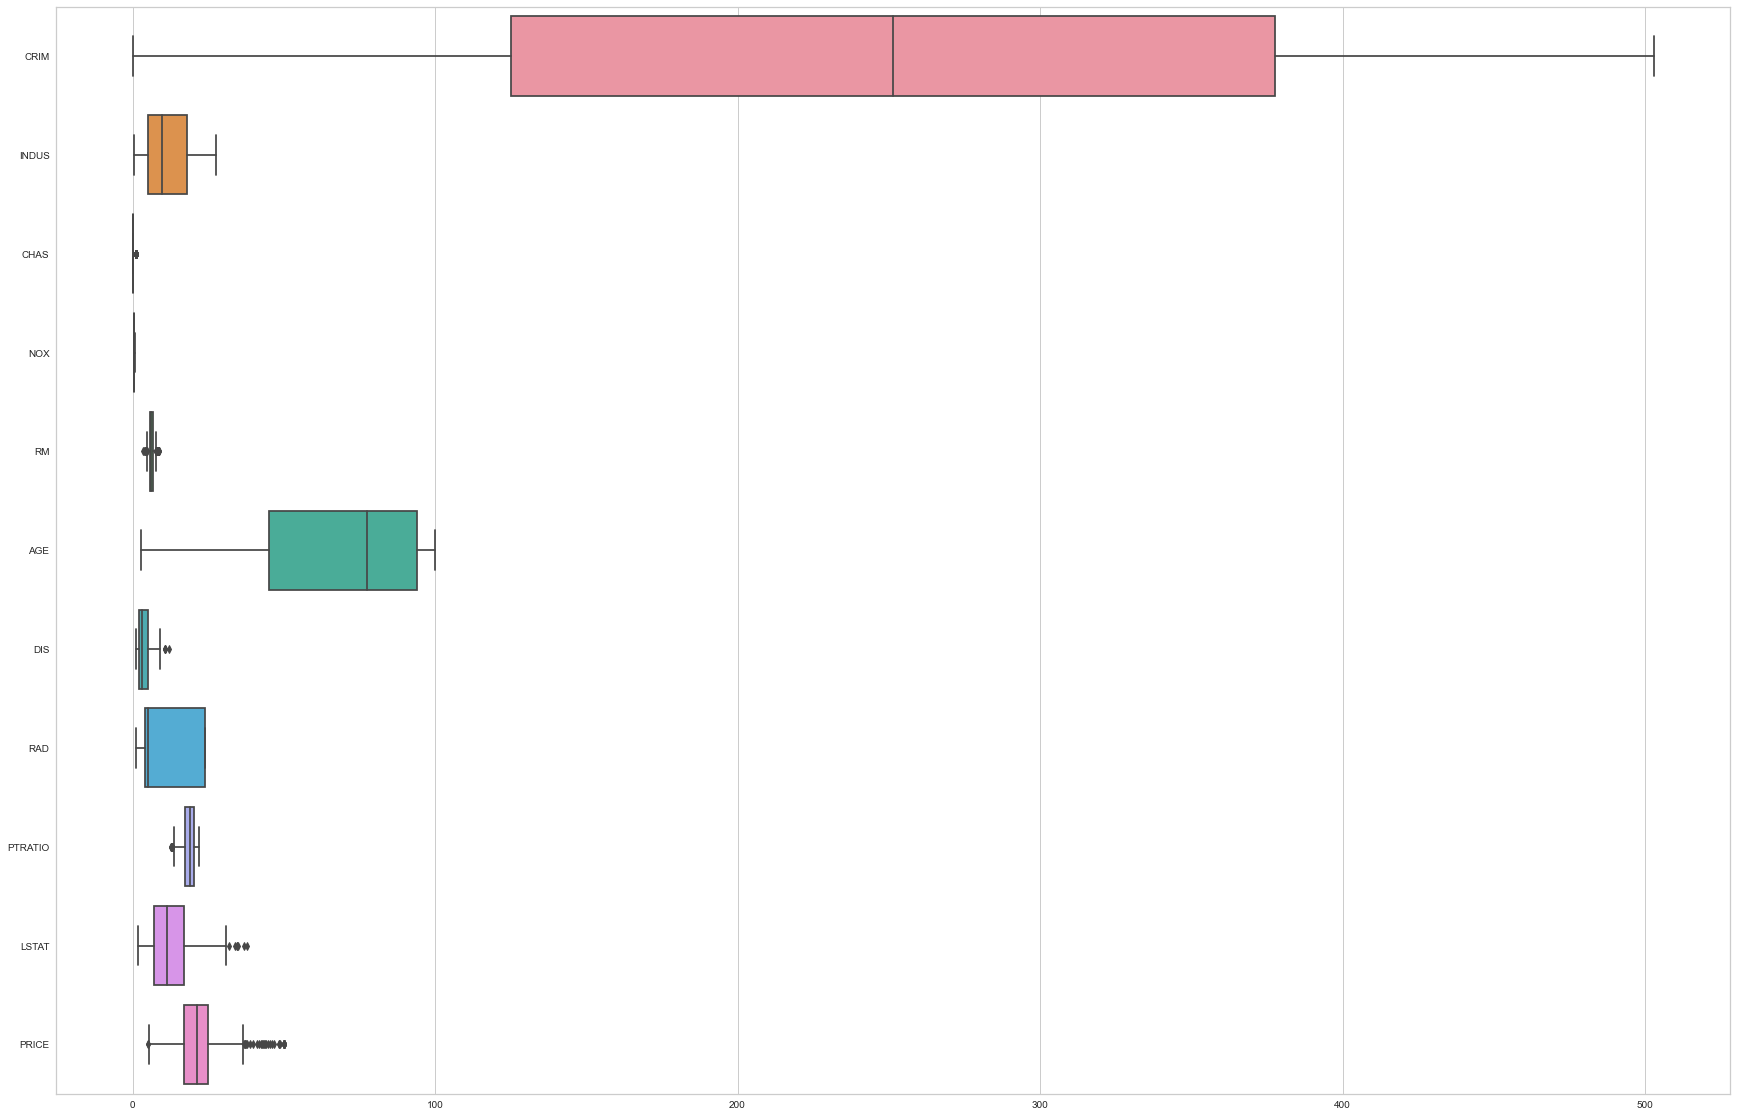

In [111]:
#### TESTING CHANGES FROM CONTINUOUS VALUE ####
from sklearn import preprocessing
from sklearn import utils

le = preprocessing.LabelEncoder()
houseData["CRIM"] = le.fit_transform(houseData["CRIM"])

import seaborn as sns

sns.boxplot(data=houseData, orient='h')

In [112]:
mutualInfoRequession

array([1.47869167, 0.01079687, 1.48696747, 0.22739113, 0.24971213,
       1.3771835 , 0.74211293, 1.23753772, 0.        , 0.34538614])

In [113]:
spareMatrix

<506x10 sparse matrix of type '<class 'numpy.float64'>'
	with 4589 stored elements in Dictionary Of Keys format>

0.9295444975765148

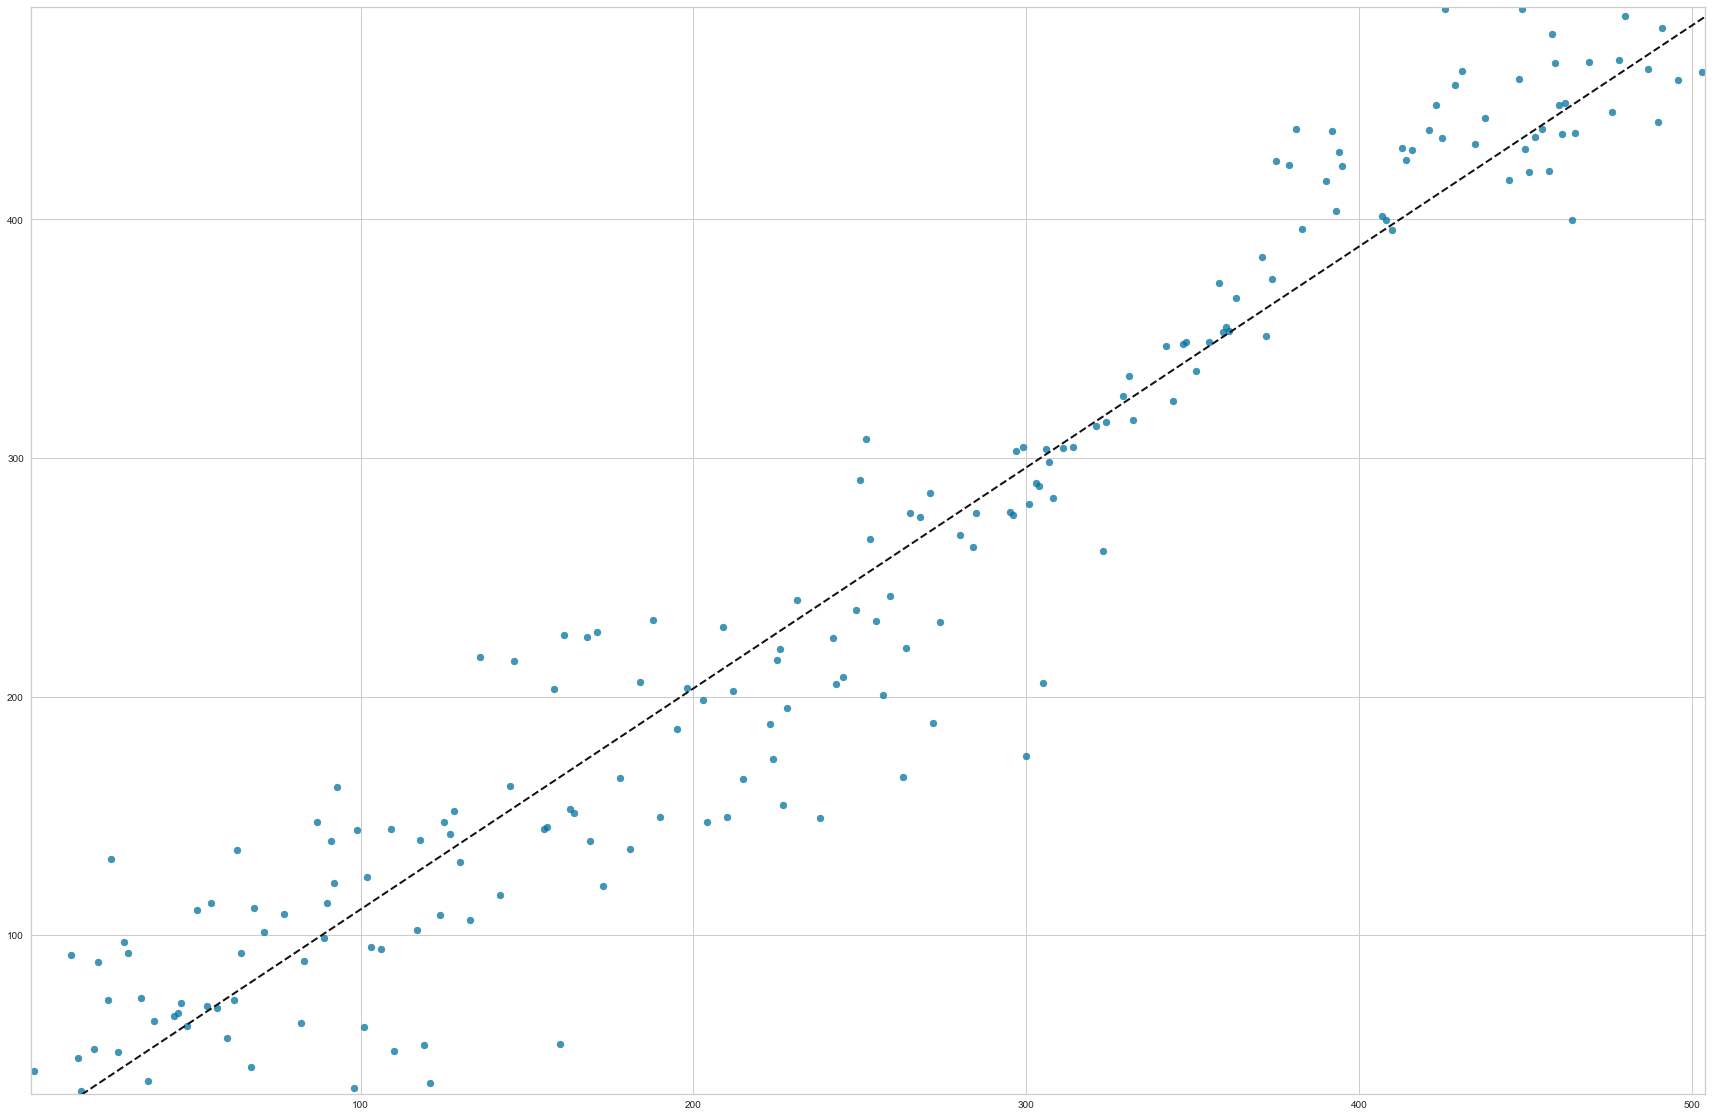

In [114]:
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(spareMatrix, houseData["CRIM"], train_size=0.62, random_state = 1  )

# Instantiate the linear model and visualizer
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#visualizer.show()                 # Finalize and render the figure

My model has a high correlation but the data does not correlated to the crime data with super high probability. The model can start to deviate from the real world as the model is not super high in probability of percentage but still acceptable for predicting. There are more 
opportunities by removing, filtering or modifying data from features. The model could probably be improve by removing outliers.I chose the following model by trial and error method. I chose the line method first and it did not fit. I went back to the documentation to find different models which might correlate with the data better and I found the latest model. 